### Inspecting the data and creating a pipeline to perform any feature processing.

We are using pima_indian dataset for inspecting.

In [153]:
import pandas as pd
import seaborn as sns
import numpy as np


In [154]:
data=pd.read_csv("pima_indian_data.csv")

In [155]:
data

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [156]:
data.describe()

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [157]:
data.head(10)


,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [158]:
data.info

<bound method DataFrame.info of      Number  of times pregnant  Plasma glucose  Diastolic blood pressure  \
0                            6             148                        72   
1                            1              85                        66   
2                            8             183                        64   
3                            1              89                        66   
4                            0             137                        40   
..                         ...             ...                       ...   
763                         10             101                        76   
764                          2             122                        70   
765                          5             121                        72   
766                          1             126                        60   
767                          1              93                        70   

     Triceps skinfold thickness  serum insulin  Body ma

In [159]:
data.isna().sum().sum()


0

This means it has 0 missing values.

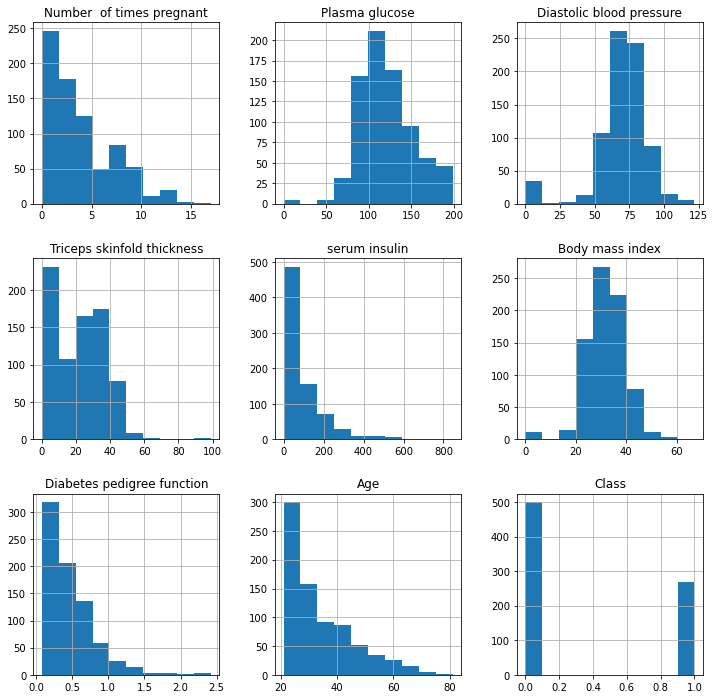

In [160]:
import matplotlib.pyplot as plt
%matplotlib inline

data.hist(figsize=(12,12))
plt.show()


- No specific issues with the data quality, the target class is slightly imbalanced. The data should be balanced before entering to the model.
- We need to standardize the features as values are numerical on different scales.


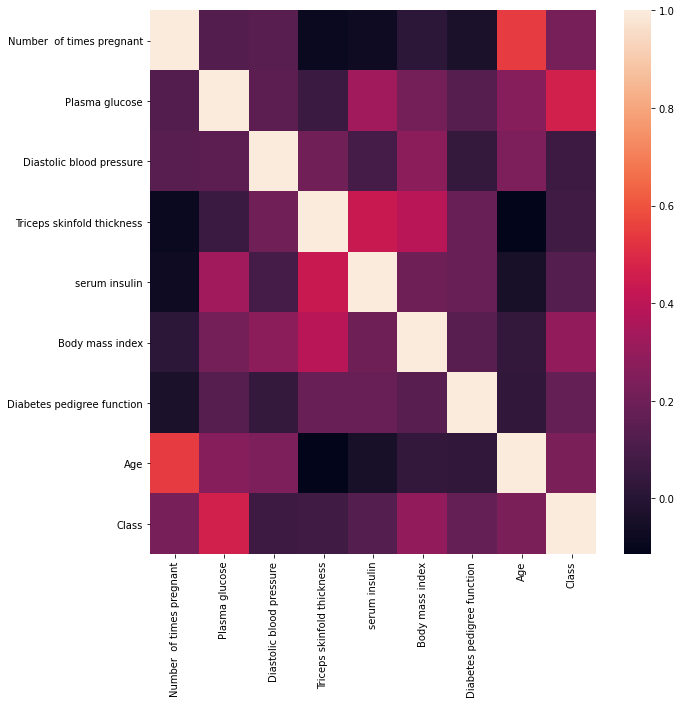

In [161]:

plt.figure(figsize=(10,10))
sns.heatmap(data.corr())
plt.show()

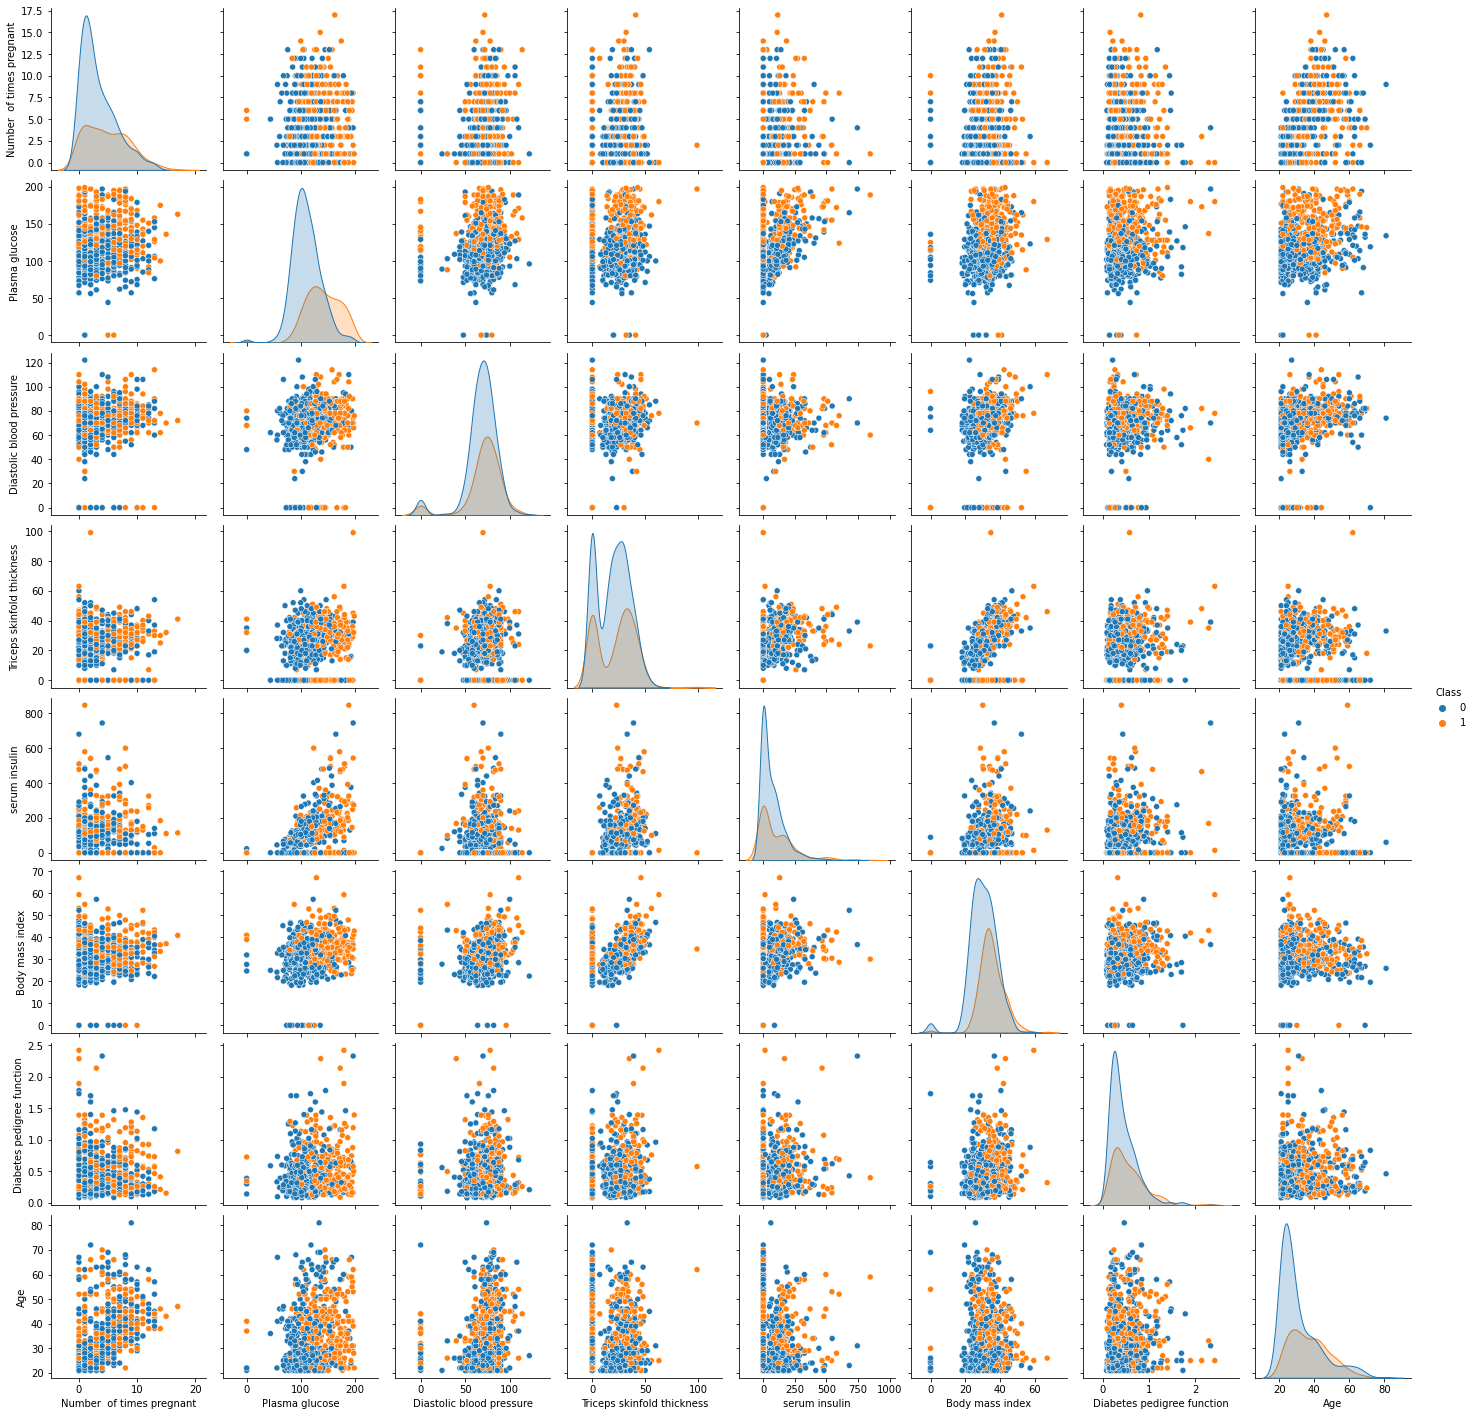

In [162]:
sns.pairplot(data,hue='Class',)


Reference - https://github.com/appliedecon/data602-lectures/blob/main/week07/model-evaluation.ipynb

### Spliting the data into training/test sets.

In [163]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

print("X Train sample size ",X_train.shape[0])
print("X Test sample size ",X_test.shape[0])

print("Y Train sample size ",y_train.shape[0])
print("Y Test sample size ",y_test.shape[0])

X Train sample size  614
X Test sample size  154
Y Train sample size  614
Y Test sample size  154


In [165]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

modeling_pipeline = Pipeline([('Standard Scalr', StandardScaler()),
                              ('LogisticRegres.', LogisticRegression())])


pipeline = modeling_pipeline.fit(X_train, y_train)
pipeline

Pipeline(steps=[('Standard Scalr', StandardScaler()),
                ('LogisticRegres.', LogisticRegression())])

In [166]:
from sklearn.metrics import confusion_matrix, classification_report
preds = pipeline.predict(X_test)
print('Confusion Matrix \n',confusion_matrix(y_test,preds))
print('Classification Report\n',classification_report(y_test,preds))

Confusion Matrix 
 [[98  9]
 [18 29]]
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



#### ROC Curve

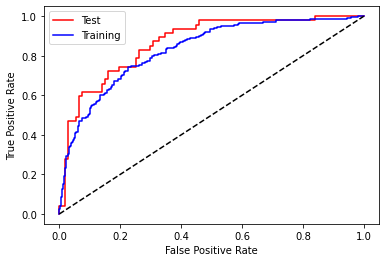

In [167]:


from sklearn.metrics import roc_curve

def generate_probs(X, model=pipeline):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.show()

In [168]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, generate_probs(X_test))

0.8661761781666335

#### Conclusion
- It is a good model as the ROC curve has area more than 50%.
- Accuracy is not poor.

#### Pick a metric you are going to use to select the model and justify your choice.

We will be using recall metrix for this.
Recall = TP/(TP+FN)
The reason is it focuses more on positive instances so more the accurate data, ealier the cases can be solved.

#### Use the above combined pipeline to run a Logistic Regression model with grid search cross-validation using 10 folds. Search 5 different regularization strengths and 2 solvers. What is the best model? How does it perform on the test set?

In [169]:
pipelineLR = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=3)),
    ('logR',LogisticRegression(penalty='l2',solver='liblinear'))
]) 

param_grid = [
  {'logR__C': [1,5,10,20,30], 'pca__n_components': [1,2,3,4,5,6,7]}
 ]

cl = GridSearchCV(estimator=pipelineLR, param_grid=param_grid ,scoring='recall',n_jobs=10)

cl.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=3)),
                                       ('logR',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=10,
             param_grid=[{'logR__C': [1, 5, 10, 20, 30],
                          'pca__n_components': [1, 2, 3, 4, 5, 6, 7]}],
             scoring='recall')

In [170]:
cl.best_score_


0.5664646464646464

In [171]:
cl.best_estimator_


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=7)),
                ('logR', LogisticRegression(C=1, solver='liblinear'))])

In [172]:
for i in cl.cv_results_.keys():
    print(i)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_logR__C
param_pca__n_components
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [173]:
cl.best_params_


{'logR__C': 1, 'pca__n_components': 7}

In [174]:
from sklearn.metrics import confusion_matrix

y_test_pred = cl.predict(X_test)
print(confusion_matrix(y_test, y_test_pred))

[[98  9]
 [17 30]]


In [175]:
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.85      0.92      0.88       107
           1       0.77      0.64      0.70        47

    accuracy                           0.83       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.83      0.83      0.83       154



In [176]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipelineLR = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=3)),
    ('logR',LogisticRegression(penalty='l2',solver='sag'))
]) 

param_grid = [
  {'logR__C': [1,5,10,20,30], 'pca__n_components': [1,2,3,4,5,6,7]}
 ]

cl2 = GridSearchCV(estimator=pipelineLR, param_grid=param_grid ,scoring='recall',n_jobs=10)

cl2.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=3)),
                                       ('logR',
                                        LogisticRegression(solver='sag'))]),
             n_jobs=10,
             param_grid=[{'logR__C': [1, 5, 10, 20, 30],
                          'pca__n_components': [1, 2, 3, 4, 5, 6, 7]}],
             scoring='recall')

In [177]:
cl2.best_score_


0.5664646464646464

In [178]:
cl2.best_estimator_


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=7)),
                ('logR', LogisticRegression(C=1, solver='sag'))])

### Observations

We use 2 solvers liblinear and sag as one works better with small and other with large data.The data is clean and the model can get better if we have less differences in the number of records of positive and negative classes.
There was a difference in both accuracy and the recall metric. Model having less negatives is the best one.
